C:\Users\srust\AppData\Local\Temp\ipykernel_10288\1919583497.py:25: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pm25 = df["PM2.5"].fillna(method="ffill").fillna(method="bfill")
C:\Users\srust\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
904/904 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - loss: 0.0147 - val_loss: 0.0059
Epoch 2/50
904/904 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - loss: 0.0083 - val_loss: 0.0028
Epoch 3/50
904/904 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - loss: 0.0059 - val_loss: 0.0021
Epoch 4/50
904/904 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - loss: 0.0052 - val_loss: 0.0019
Epoch 5/50
904/904 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - loss: 0.0047 - val_loss: 0.0017
Epoch 6/50
904/904 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - loss: 0.0042 - val_loss: 0.0014
Epoch 7/50
904/904 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - loss: 0.0037 - val_loss: 0.0012
Epoch 8/50
904/904 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - loss: 0.0035 - val_loss: 0.0010
Epoch 9/50
904/904 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - loss: 0.0031 - val_loss: 9.6753e-04
Epoch 10/50
904/904 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - loss: 0.0030 - val_loss: 9.3209e-04
Epoch 11/50
904/904 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - loss: 0.0029 - val_loss: 9.1539e-04
Epoch 12/50
904/90

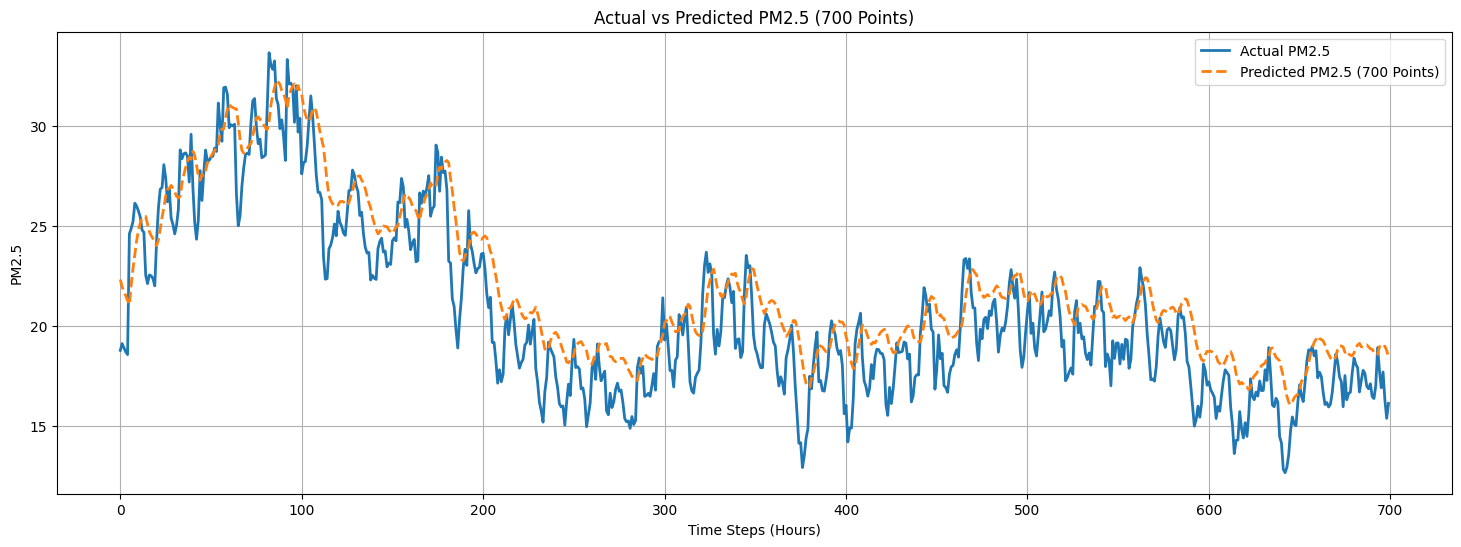

In [2]:

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


df = pd.read_csv(r'C:\Users\srust\Downloads\air-quality-india.csv')
df = df.sort_values(by=df.columns[0])

pm25 = df["PM2.5"].fillna(method="ffill").fillna(method="bfill")
pm25 = pm25.values.reshape(-1, 1).astype("float32")


scaler = MinMaxScaler()
pm25_scaled = scaler.fit_transform(pm25)


WINDOW = 37

def create_sequences(data, window):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

X, y = create_sequences(pm25_scaled, WINDOW)


split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


model = Sequential([
    LSTM(9, input_shape=(WINDOW, 1)),
    Dropout(0.2),
    Dense(1)
])

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss="mse"
)

model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


y_pred_scaled = model.predict(X_test)

y_pred = scaler.inverse_transform(y_pred_scaled)
y_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


POINTS = 700   


POINTS = min(POINTS, len(y_pred))

y_pred_700 = y_pred[:POINTS]
y_actual_700 = y_actual[:POINTS]




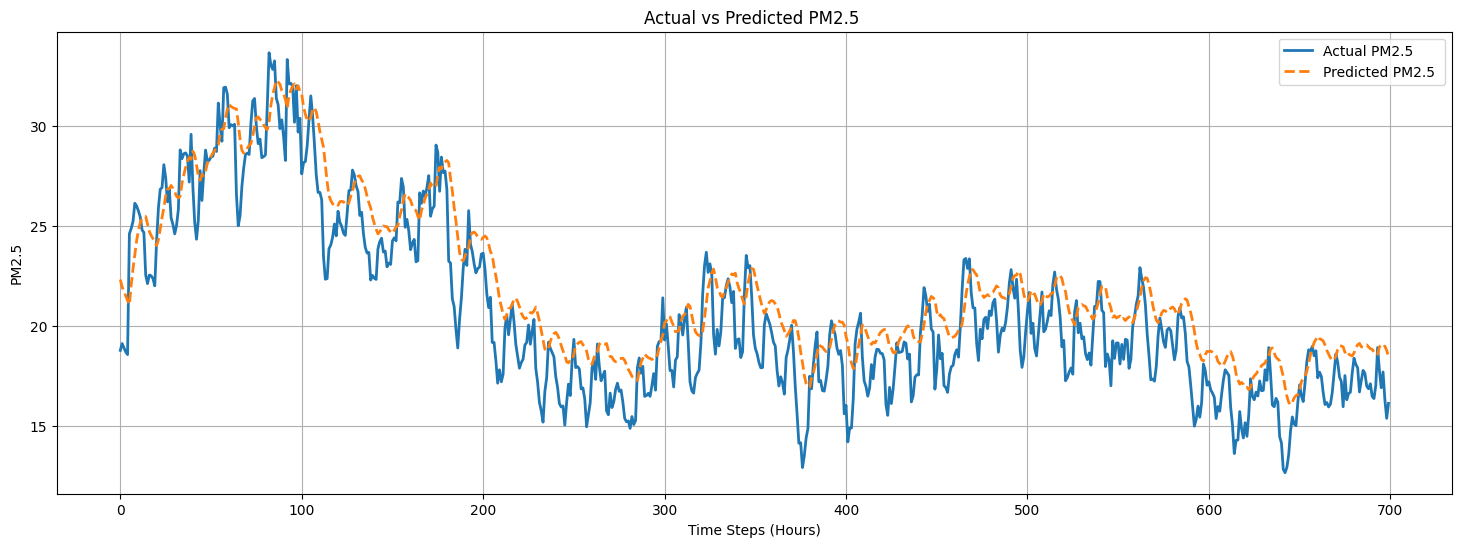

<Figure size 640x480 with 0 Axes>

In [6]:
plt.figure(figsize=(18,6))
plt.plot(y_actual_700, label="Actual PM2.5", linewidth=2)
plt.plot(y_pred_700, label="Predicted PM2.5 ", linestyle="--", linewidth=2)
plt.title("Actual vs Predicted PM2.5 ")
plt.xlabel("Time Steps (Hours)")
plt.ylabel("PM2.5")
plt.legend()
plt.grid(True)
plt.show()

plt.savefig("pm25_actual_vs_predicted_700points.png", dpi=300, bbox_inches="tight")

plt.show()
